> ## The dataset is imported from <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">Kaggle</a>

> ## About this dataset

**id - Unique ID for each home sold**

**date - Date of the home sale**

**price - Price of each home sold**

**bedrooms - Number of bedrooms**

**bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower**

**sqft_living - Square footage of the apartments interior living space**

**sqft_lot - Square footage of the land space**

**floors - Number of floors**

**waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not**

**view - An index from 0 to 4 of how good the view of the property was**

**condition - An index from 1 to 5 on the condition of the apartment,**

**grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.**

**sqft_above - The square footage of the interior housing space that is above ground level**

**sqft_basement - The square footage of the interior housing space that is below ground level**

**yr_built - The year the house was initially built**

**yr_renovated - The year of the house’s last renovation**

**zipcode - What zipcode area the house is in**

**lat - Lattitude**

**long - Longitude**

**sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors**

**sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors**


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

# Library for detecting outliers
import datasist as ds

# Dealing with database
import sqlite3

# Saving the model
import joblib

import session_info

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,10)},font_scale = 1.2)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('dataset/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


> # Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
# Showing full info about the data
for col in df.columns:
    print(f'For column {col}')
    print(f'Values count:\n{df[col].value_counts()}\n')
    print(f'Unique values: {df[col].unique()}')
    print(f'No. of unique values: {df[col].nunique()}')
    print(f'No. of missing values: {df[col].isnull().sum()}')
    print('*' * 80)
    
print(f'No. of duplicated rows : {df.duplicated().sum()}')

For column id
Values count:
795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64

Unique values: [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
No. of unique values: 21436
No. of missing values: 0
********************************************************************************
For column date
Values count:
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140517T000000      1
20150117T000000      1
20140803T000000      1
20150131T000000      1
20150308T000000      1
Name: date, Length: 372, dtype: int64

Unique values: ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000

Values count:
0    21450
1      163
Name: waterfront, dtype: int64

Unique values: [0 1]
No. of unique values: 2
No. of missing values: 0
********************************************************************************
For column view
Values count:
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Unique values: [0 3 4 2 1]
No. of unique values: 5
No. of missing values: 0
********************************************************************************
For column condition
Values count:
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Unique values: [3 5 4 1 2]
No. of unique values: 5
No. of missing values: 0
********************************************************************************
For column grade
Values count:
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

Unique values: [ 7  6  8 11  9  5 10 12  4  3

> ## Data Wrangling

In [6]:
# First We should convert some float variables into int
df['price'] = round(df['price']).astype('int64')
df['bathrooms'] = round(df['bathrooms']).astype('int64')
df['floors'] = round(df['floors']).astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,1,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
df['date'] = df['date'].apply(lambda x:f'{x[:4]}-{x[4:6]}-{x[6:8]}')

In [10]:
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# Rearrangin the data to push to the databse
df = df[['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']]

In [13]:
# Saving as database
connection = sqlite3.connect('dataset/Houses.db')
df.to_sql('Houses',connection)
connection.close()

In [14]:
connection.close()

In [15]:
# Now we can drop date and street columns
df.drop(['id','date'],axis=1,inplace=True)

> ## Data Visualizatoin

<AxesSubplot:>

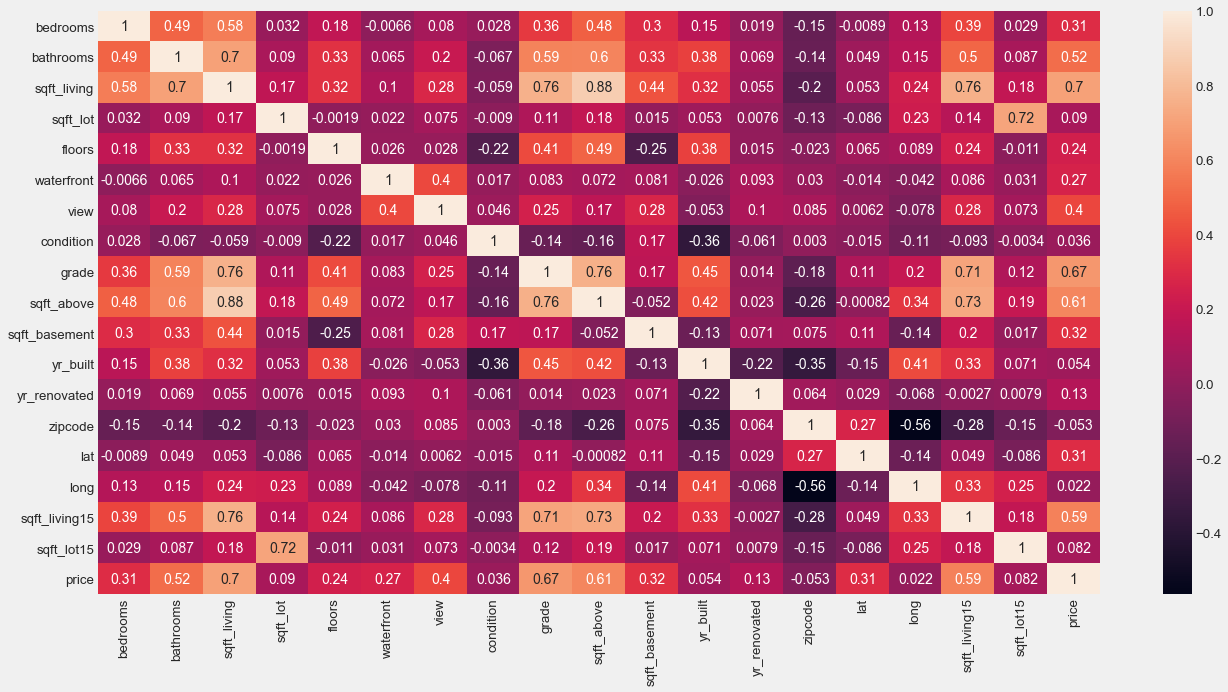

In [16]:
# Now we can check the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [18]:
# So from the figure above we can drop some unuseful columns
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_basement','price']]

<Figure size 1440x720 with 0 Axes>

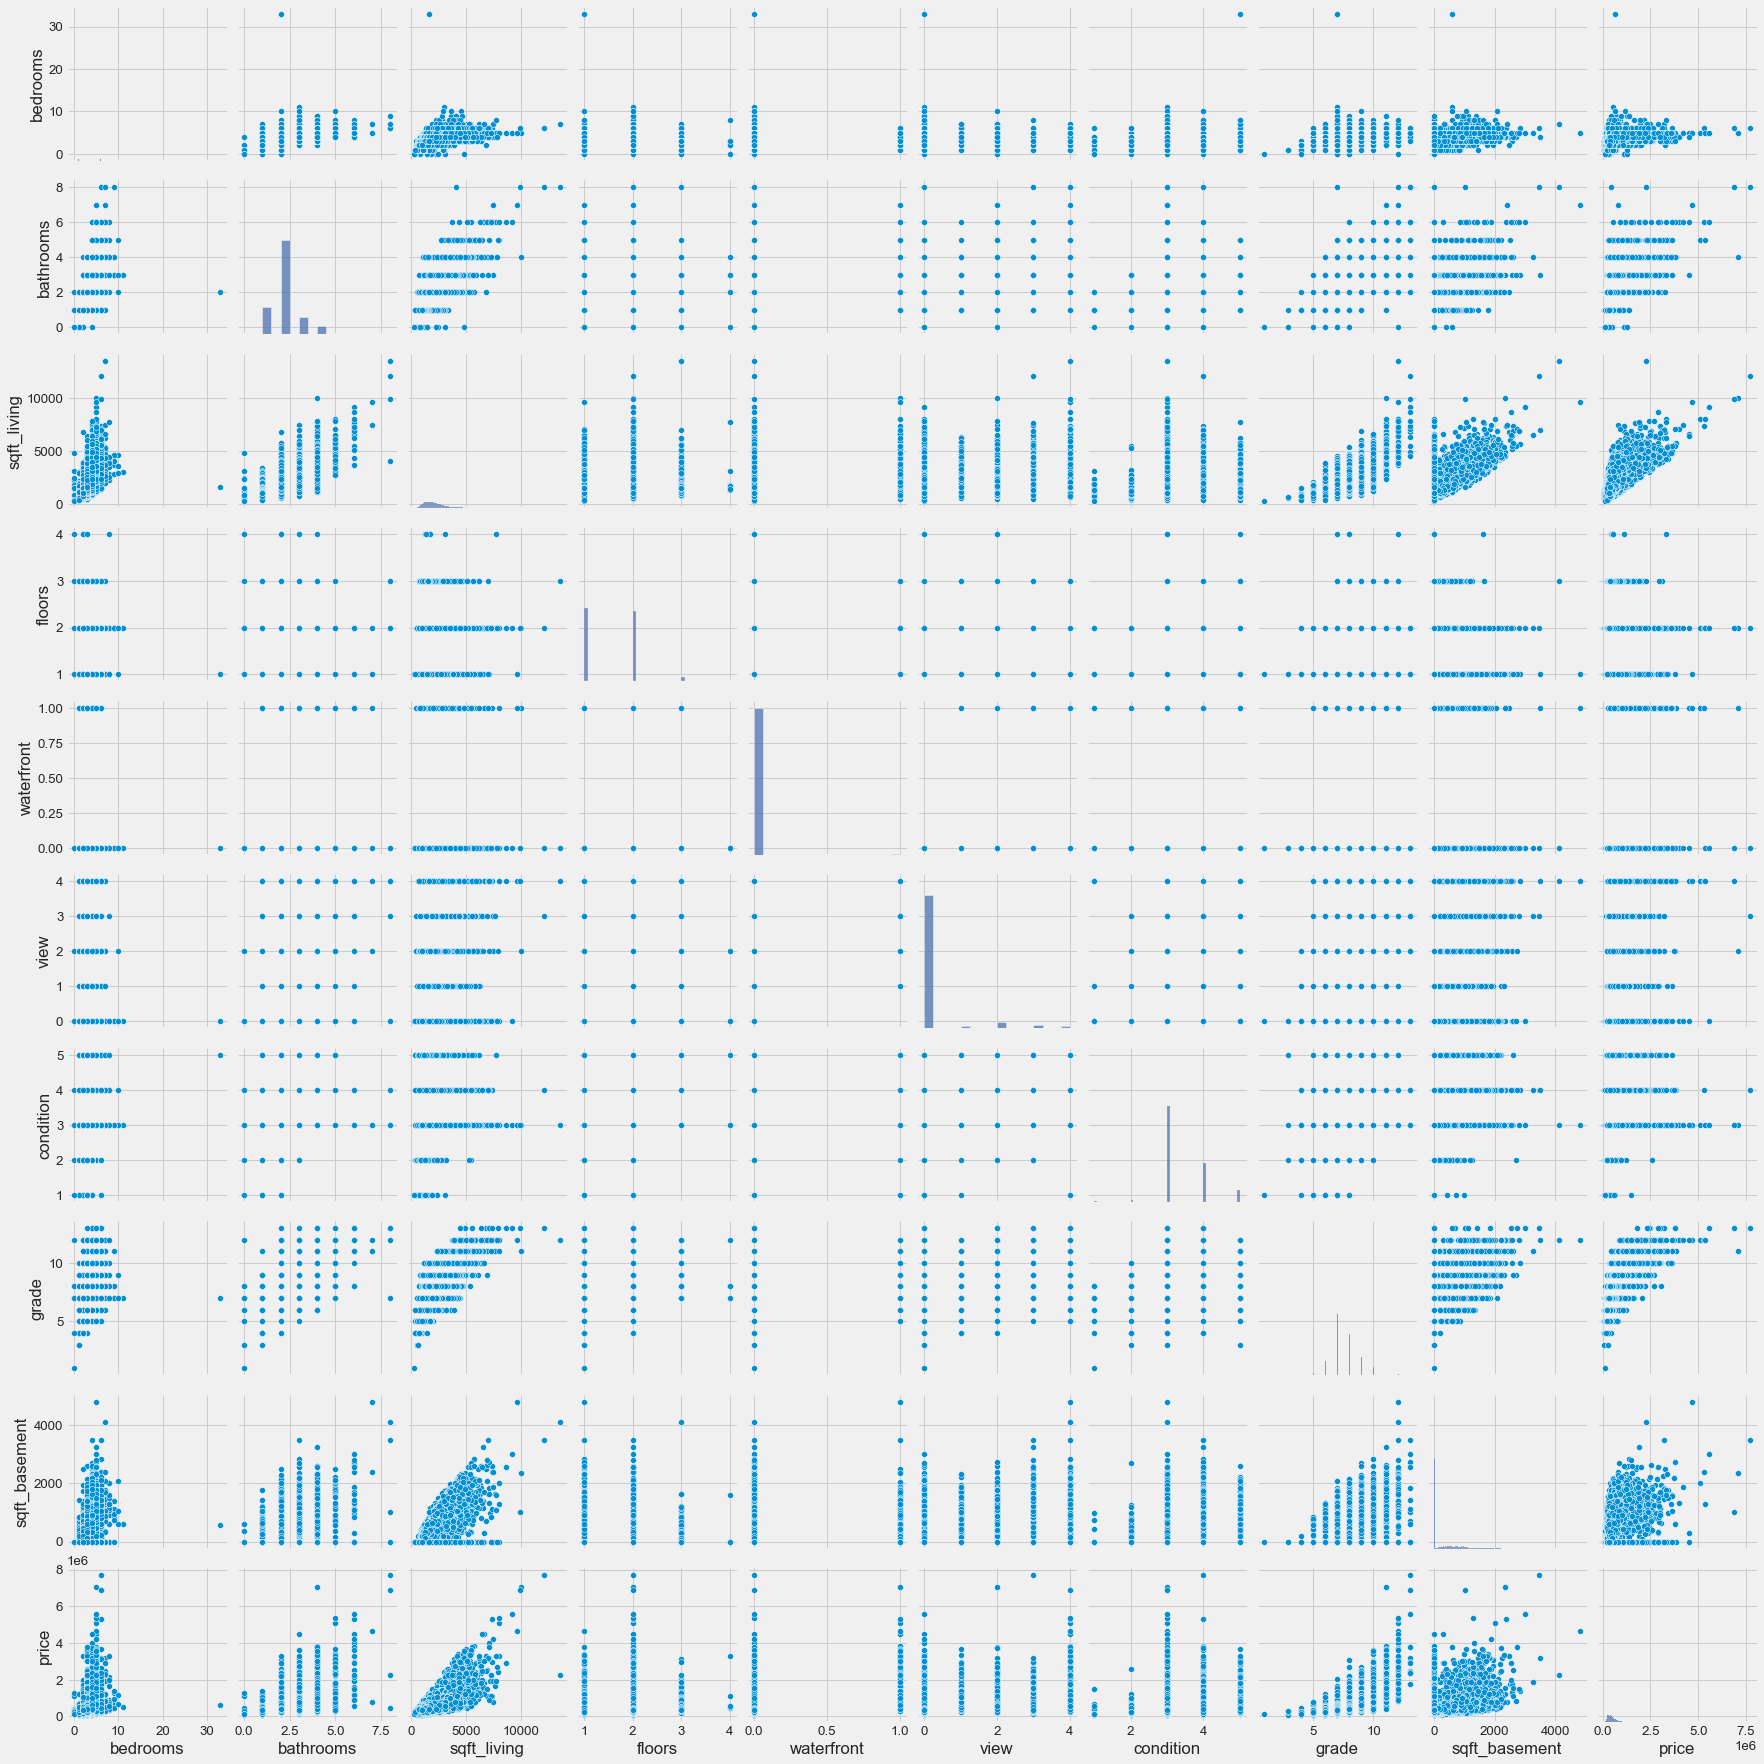

In [19]:
plt.figure(figsize=(20,10))
sns.pairplot(df)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

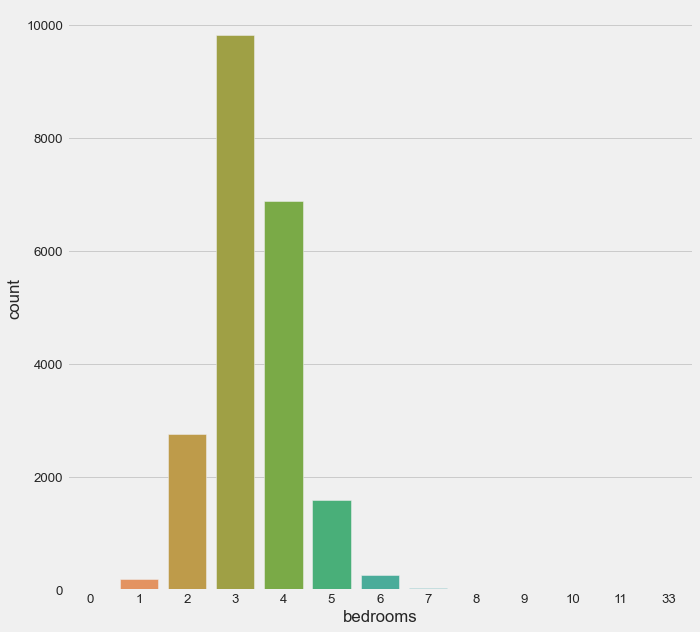

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

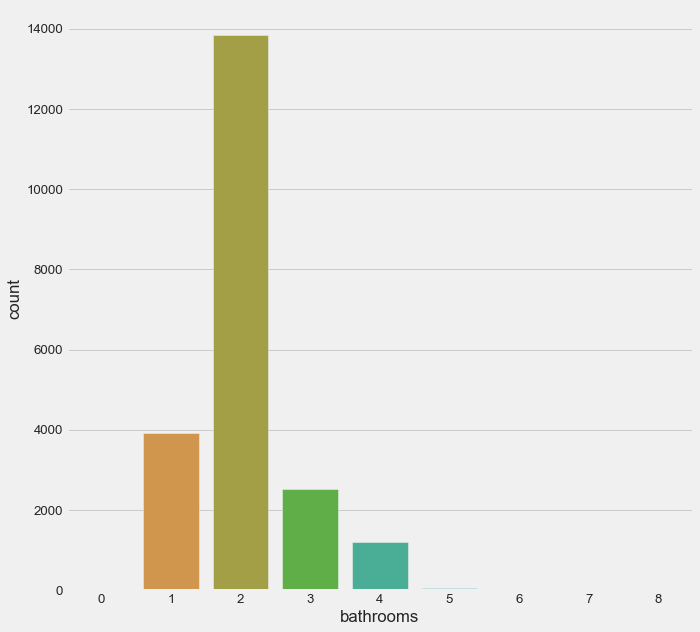

In [21]:
sns.countplot(df['bathrooms'])

<AxesSubplot:xlabel='floors', ylabel='count'>

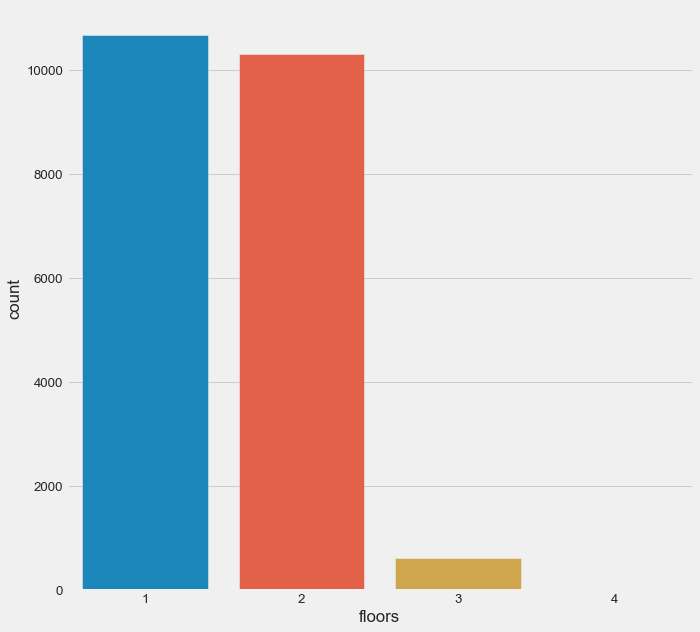

In [22]:
sns.countplot(df['floors'])

<AxesSubplot:xlabel='waterfront', ylabel='count'>

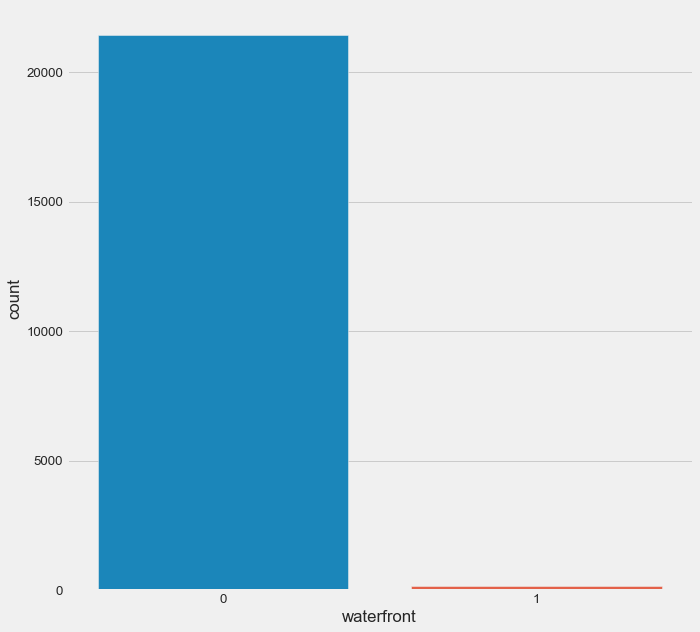

In [23]:
sns.countplot(df['waterfront'])

<AxesSubplot:xlabel='view', ylabel='count'>

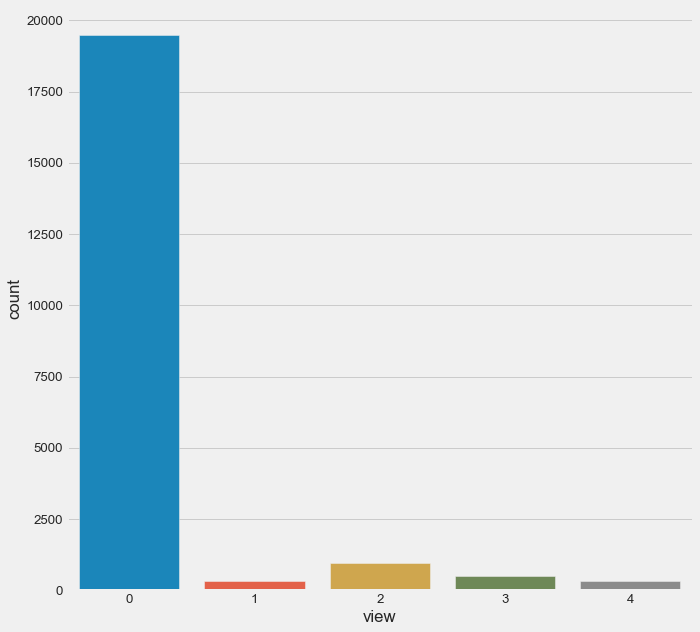

In [24]:
sns.countplot(df['view'])

**To know more how the view correlates with the price, we should deduce it from kdeplot**

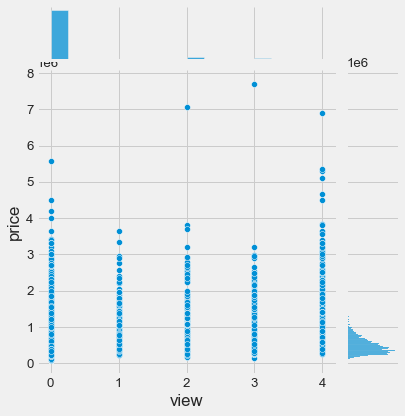

In [25]:
sns.jointplot(y = df['price'],x = df['view'])

<AxesSubplot:xlabel='condition', ylabel='count'>

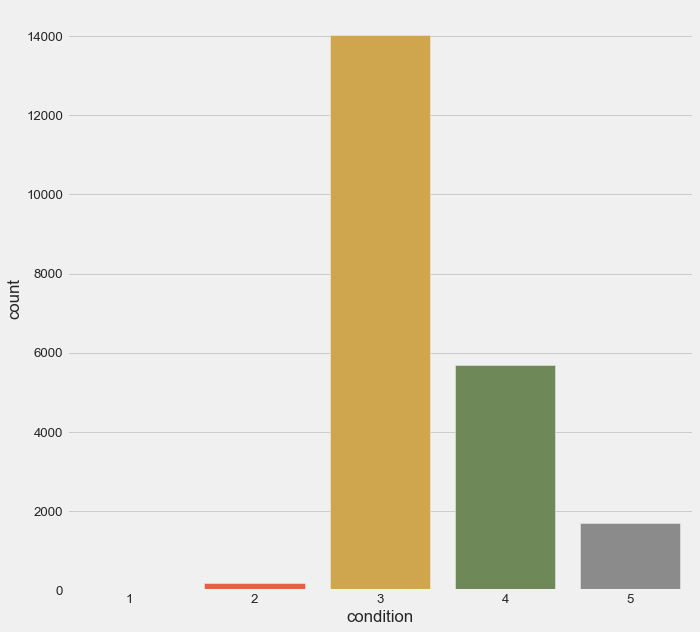

In [26]:
sns.countplot(df['condition'])

<AxesSubplot:xlabel='grade', ylabel='count'>

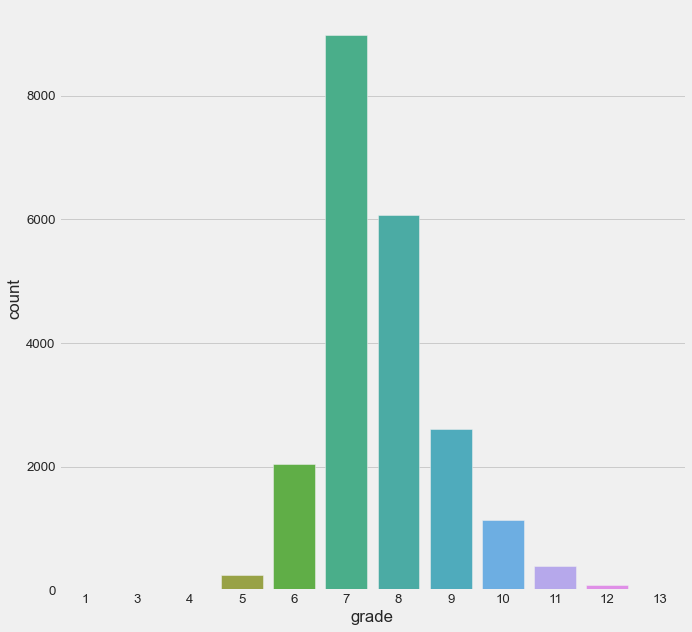

In [27]:
sns.countplot(df['grade'])

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

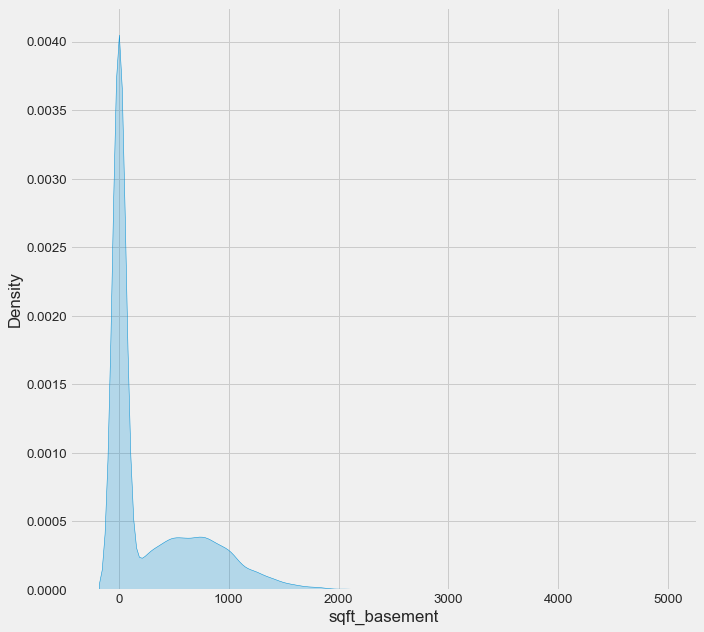

In [28]:
sns.kdeplot(df['sqft_basement'],shade=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

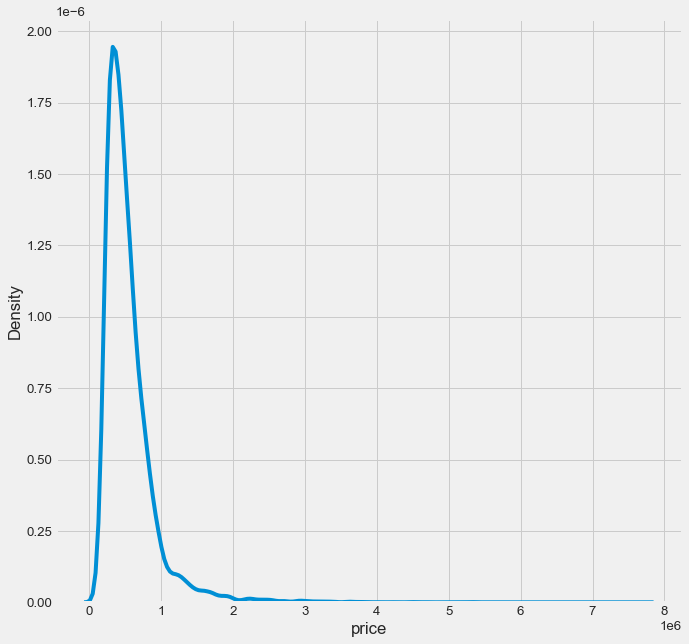

In [29]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='price'>

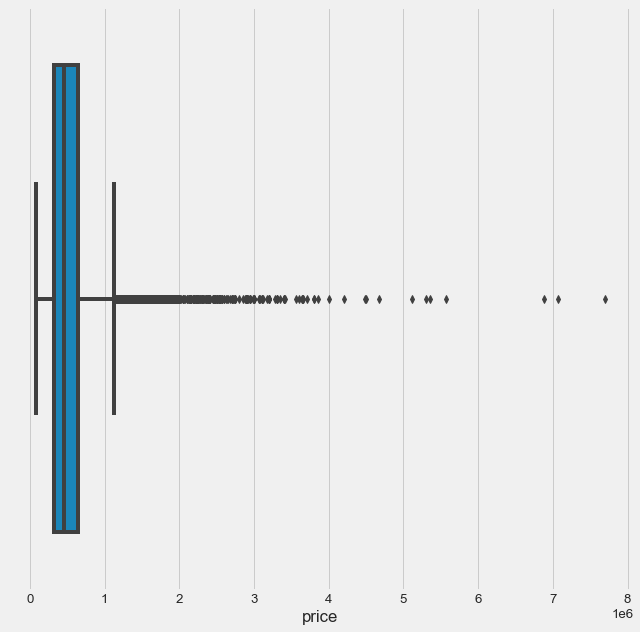

In [30]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='condition'>

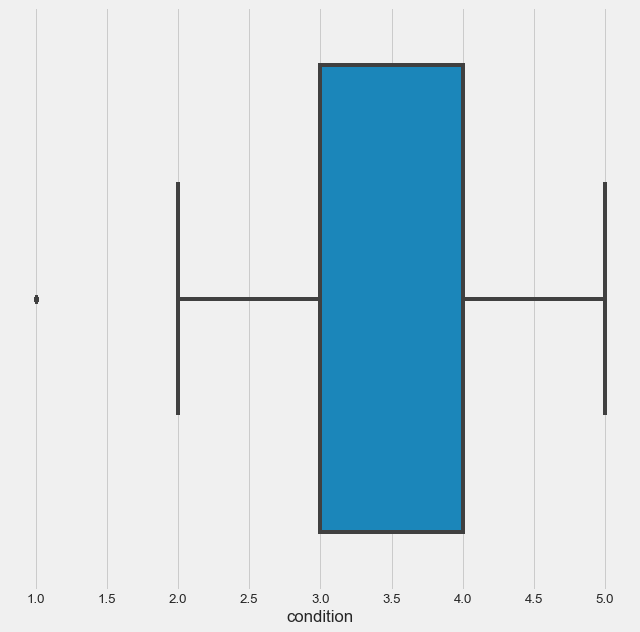

In [31]:
sns.boxplot(df['condition'])

<AxesSubplot:xlabel='sqft_living'>

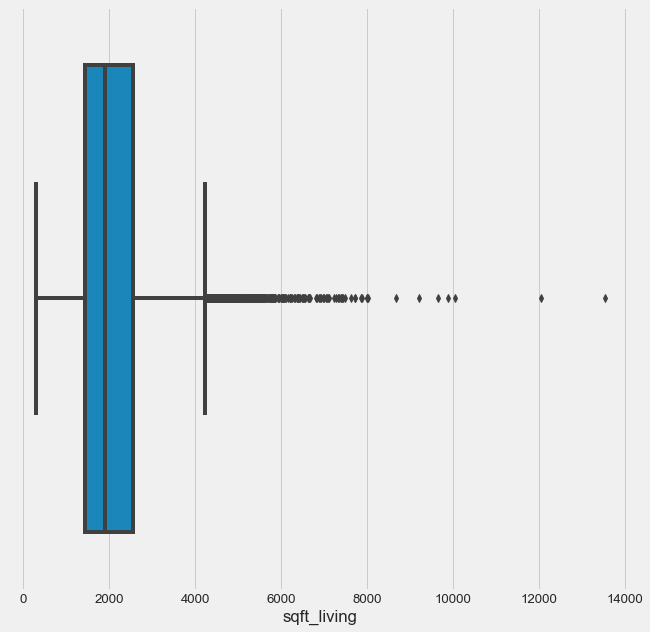

In [32]:
sns.boxplot(df['sqft_living'])

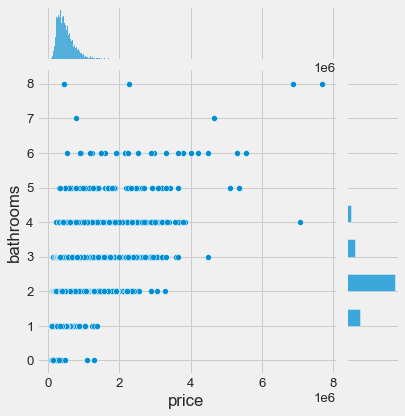

In [33]:
sns.jointplot(df['price'],df['bathrooms'])

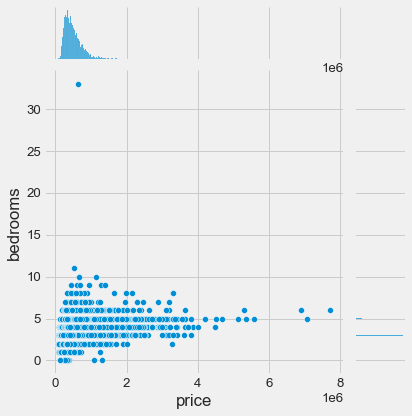

In [34]:
sns.jointplot(df['price'],df['bedrooms'])

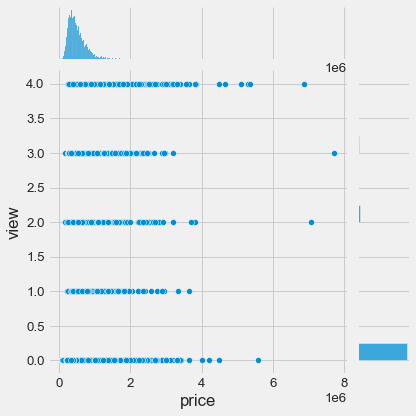

In [35]:
sns.jointplot(df['price'],df['view'])

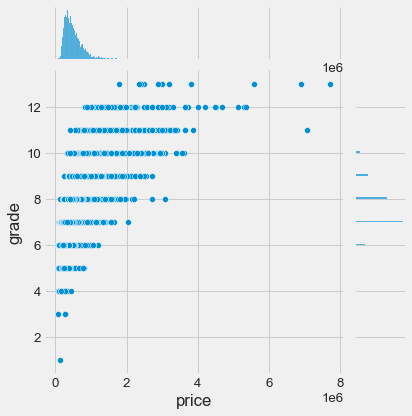

In [36]:
sns.jointplot(df['price'],df['grade'])

> ## Machine Learning

**We will try training the models before and after removing some outliers**

In [37]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'price'],
      dtype='object')

In [38]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_basement']]
y = df['price']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    random_state=42,test_size=0.2)

In [40]:
scaler = RobustScaler()

In [41]:
x_train = scaler.fit_transform(x_train)

In [42]:
x_test = scaler.transform(x_test)

In [43]:
models = {'LR':LinearRegression(),
         'DTR':DecisionTreeRegressor(),
         'RFR':RandomForestRegressor(),
         'XGR':XGBRegressor()}

**Before removing the outliers**

In [44]:
for name,model in models.items():
    print(f'For model {name}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Testing score = {model.score(x_test,y_test)}')
    print(f'Trainig score = {model.score(x_train,y_train)}')
    print(f'R2 score = {r2_score(y_test,y_pred)}')
    print(f'RMSE = {np.sqrt(mean_squared_error(y_pred,y_test))}')
    print('*' * 50)

For model LR
Testing score = 0.6136277323107786
Trainig score = 0.6018122638366186
R2 score = 0.6136277323107786
RMSE = 241682.6206753034
**************************************************
For model DTR
Testing score = 0.4165450173409213
Trainig score = 0.9645520070780047
R2 score = 0.4165450173409213
RMSE = 296992.93935762305
**************************************************
For model RFR
Testing score = 0.6218214677250907
Trainig score = 0.9246381390166714
R2 score = 0.6218214677250907
RMSE = 239106.22567270036
**************************************************
For model XGR
Testing score = 0.6292251545512109
Trainig score = 0.8344519030372015
R2 score = 0.6292251545512109
RMSE = 236754.13855409596
**************************************************


**So from the report above we can deduce that the best model is XGB Regressor**

In [45]:
XGR = XGBRegressor()
XGR.fit(x_train,y_train)
scaler = RobustScaler()
scaler.fit(x_train)

RobustScaler()

In [46]:
joblib.dump(XGR,'model/model.h5')
joblib.dump(scaler,'model/scaler.h5')

['model/scaler.h5']

**We will try to remove the outliers and see if this can achieve better performance or not**

In [47]:
#df.drop(df.query(f"price > {1200000} & sqft_living > {4200}").index,inplace=True)
outliers = ds.structdata.detect_outliers(df,0,df.columns)

In [48]:
df = df[~df.index.isin(outliers)]

In [49]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 
       'sqft_basement']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    random_state=42,test_size=0.2)

In [50]:
scaler = StandardScaler()

In [51]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
for name,model in models.items():
    print(f'For model {name}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Testing score = {model.score(x_test,y_test)}')
    print(f'Trainig score = {model.score(x_train,y_train)}')
    print(f'R2 score = {r2_score(y_pred,y_test)}')
    print(f'RMSE = {np.sqrt(mean_squared_error(y_pred,y_test))}')
    print('*' * 50)

For model LR
Testing score = 0.3383569021110283
Trainig score = 0.34191492162357917
R2 score = -0.9984841095316299
RMSE = 140792.77200522818
**************************************************
For model DTR
Testing score = -0.059247486811133454
Trainig score = 0.8391557437231605
R2 score = -0.2260289517925611
RMSE = 178142.35429751166
**************************************************
For model RFR
Testing score = 0.24932503372116788
Trainig score = 0.7794052583231248
R2 score = -0.4228221590896917
RMSE = 149966.5611971275
**************************************************
For model XGR
Testing score = 0.34353168012739277
Trainig score = 0.588599433648969
R2 score = -0.5280701797656087
RMSE = 140241.1139439512
**************************************************


**So removing the outliers hasn't achieved a better performance**